In [1]:
import json
import pandas as pd
import time
# data = [json.loads(line) for line in open(r'C:\Users\Mhaiskao\Desktop\Assignments\MSc Project\tiktok.json', 'r',encoding="utf8")]
data = [json.loads(line) for line in open(r'C:\Users\Mhaiskao\Desktop\Assignments\MSc Project\scraper\tiktok.json', 'r',encoding="utf8")]

In [2]:
print(data[84594])

{'_id': {'$oid': '5e45b83b1e60cb0587daa14a'}, 'id': '6767383262466690309', 'apiType': 3, 'name': 'me and my girls kotd #HolidayBeat #handitover #UNOirl #shoe #arizona #fyp #foryou #foryoupage #viral #senior #school #pumanation', 'surfaced': 1, 'diggCount': 269268, 'shareCount': 5798, 'commentCount': 1186, 'author': {'name': 'Mia Strauss', 'uniqueID': 'miastrauss61', 'userID': '6624916310538010629', 'secureUserID': 'MS4wLjABAAAA_AXdHoB9VjEpejrK-0j7mRQl8aJYtFjDpQhieDelkZ6ud7KUMZHd62vGhOXcEMgR'}, 'createdAt': {'$date': '2020-02-13T20:57:31.773Z'}, 'updatedAt': {'$date': '2020-02-13T20:57:31.773Z'}, 'tiktokData': [{'itemInfos': {'id': '6767383262466690309', 'text': 'me and my girls kotd #HolidayBeat #handitover #UNOirl #shoe #arizona #fyp #foryou #foryoupage #viral #senior #school #pumanation', 'createTime': '1575654203', 'authorId': '6624916310538010629', 'musicId': '6728277894730090498', 'covers': ['https://p16.muscdn.com/obj/tos-maliva-p-0068/b8b1067b5cd0b00e811c9b858904c964'], 'coversO

In [3]:
#################################IMp###################

In [154]:
from dateutil import parser
id_list=[]
text_list=[]
Music_id_list=[]
Music_name_list=[]
Author_id_list=[]
Created_time=[]
verified_list=[]

sharecount_list=[]
digcount_list=[]
commentcount_list=[]
scrape_time_list=[]
playcount_list=[]
final_comment_count=[]
final_share_count=[]
final_digg_count=[]
final_play_count=[]
bin_time_list=[]
challenge_name_list=[]
challenge_id_list=[]

for i in range(0,len(data)):
    id_list.append(data[i]['tiktokData'][0]['itemInfos']['id'])
    text_list.append(data[i]['tiktokData'][0]['itemInfos']['text'].lower())
    Music_id_list.append(data[i]['tiktokData'][0]['musicInfos']['musicId'])
    Music_name_list.append(data[i]['tiktokData'][0]['musicInfos']['musicName'])
    Author_id_list.append(data[i]['tiktokData'][0]['itemInfos']['authorId'])
    created_date=parser.isoparse(data[i]['createdAt']['$date'])
    Created_time.append(created_date.strftime("%x"))
    verified_list.append(data[i]['tiktokData'][0]['authorInfos']['verified'])
    
    #Save challenges Name and Challenge Id for every video
    
    challenge_name=[]
    challenge_id=[]
    
    #Check if no challenges are present
    
    if len(data[i]['tiktokData'][0]['challengeInfoList']) == 0:
        challenge_id.append('Empty')
        challenge_name.append('Empty')
    else:
        for j in range(0,len(data[i]['tiktokData'][0]['challengeInfoList'])):
            challenge_id.append(data[i]['tiktokData'][0]['challengeInfoList'][j]['challengeId'])
            challenge_name.append(data[i]['tiktokData'][0]['challengeInfoList'][j]['challengeName'])
    challenge_id_list.append(challenge_id)
    challenge_name_list.append(challenge_name)
    
    #Get Share, Comment and Digg Count 
    
    sharecount=[]
    digcount=[]
    commentcount=[]
    scrape_time=[]
    playcount=[]
    bin_time=[]
    for j in range(0,len(data[i]['tiktokData'])):   
        date=parser.isoparse(data[i]['tiktokData'][j]['scrapedAt']['$date'])
        digcount.append(data[i]['tiktokData'][j]['itemInfos']['diggCount'])
        sharecount.append(data[i]['tiktokData'][j]['itemInfos']['shareCount'])
        commentcount.append(data[i]['tiktokData'][j]['itemInfos']['commentCount'])
        scrape_time.append(date.strftime("%x %H"))
        if date.hour in range(0,6):
            bin_time.append("{},{}".format(date.strftime("%x %A"),'Part 1'))
        elif date.hour in range(7,12):
            bin_time.append("{},{}".format(date.strftime("%x %A"),'Part 2'))
        elif date.hour in range(13,18):
            bin_time.append("{},{}".format(date.strftime("%x %A"),'Part 3'))
        else:
            bin_time.append("{},{}".format(date.strftime("%x %A"),'Part 4'))
        try:
            playcount.append(data[i]['tiktokData'][j]['itemInfos']['playCount'])
        except KeyError:
            playcount.append(0)
    bin_time_list.append(bin_time)        
    sharecount_list.append(sharecount)
    digcount_list.append(digcount)
    commentcount_list.append(commentcount)
    final_comment_count.append(commentcount[-1])
    scrape_time_list.append(scrape_time)
    playcount_list.append(playcount) 
    final_share_count.append(sharecount[-1])
    final_digg_count.append(digcount[-1])
    final_play_count.append(playcount[-1])
    
df_final=pd.DataFrame(list(zip(id_list,text_list,Music_id_list,Music_name_list,Author_id_list,Created_time,verified_list,challenge_id_list,challenge_name_list,
                               sharecount_list,final_share_count,digcount_list,final_digg_count,commentcount_list,final_comment_count,scrape_time_list,bin_time_list,playcount_list,final_play_count)),
                       columns=['ID','Text','Music Id','Music Name','Author ID','Created Time','Verified List','challenge_list','challenge_list_Name','Sharecount List','Final Share Count',
                                'Diggcount List','Final Digg Count','Commentcount List','Final Comment Count','Scrape_time List','Bin Time','Playcount List','Final Play Count'])



In [155]:
df_final

,ID,Text,Music Id,Music Name,Author ID,Created Time,Verified List,challenge_list,challenge_list_Name,Sharecount List,Final Share Count,Diggcount List,Final Digg Count,Commentcount List,Final Comment Count,Scrape_time List,Bin Time,Playcount List,Final Play Count
0,6761927387056803078,⚠️dont watch this if you get scared easily⚠️,6617219327542168326,I smell pennies,6618145947888091141,02/12/20,False,[Empty],[Empty],"[464380, 464382, 464419, 464732, 464803, 46484...",471128,"[5531509, 5531557, 5532040, 5535622, 5536352, ...",5616598,"[34383, 34383, 34388, 34416, 34422, 34425, 344...",34999,"[02/12/20 22, 02/12/20 22, 02/12/20 22, 02/13/...","[02/12/20 Wednesday,Part 4, 02/12/20 Wednesday...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 42814096, 42816773...",43952543
1,6767171268698459397,why did she have to do us like that??#duet wit...,6735137560026172166,Shake Dat (feat. Lil Jay),6675059467253629958,02/12/20,True,[30496],[duet],"[88432, 88432, 88435, 88453, 88461, 88472, 884...",90759,"[3642884, 3642908, 3643156, 3644044, 3644412, ...",3740664,"[14517, 14517, 14519, 14519, 14520, 14522, 145...",14877,"[02/12/20 22, 02/12/20 22, 02/12/20 22, 02/13/...","[02/12/20 Wednesday,Part 4, 02/12/20 Wednesday...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 31185730,...",32397020
2,6790763152624635142,knock knock @theswayla @luvanthony @jadenhossl...,6788500679070698246,sonido original,142565009246584832,02/12/20,True,[229207],[fyp],"[29961, 29968, 30036, 30439, 30500, 30565, 306...",53380,"[2702637, 2702914, 2706246, 2726449, 2729420, ...",4171102,"[6674, 6674, 6691, 6767, 6781, 6793, 6799, 681...",11714,"[02/12/20 22, 02/12/20 22, 02/12/20 22, 02/13/...","[02/12/20 Wednesday,Part 4, 02/12/20 Wednesday...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 28988861,...",52160727
3,6776323328597708038,i had fun making this #school #math #homework ...,6654569114121554693,Why School Is Like This,6745084683459642374,02/12/20,False,"[3586, 137467, 6350, 1640512221174789, 229207,...","[school, math, homework, handwritingcheck, fyp...","[89995, 89996, 90029, 90173, 90182, 90199, 902...",103461,"[653715, 653732, 654047, 655097, 655209, 65535...",772741,"[5904, 5904, 5908, 5923, 5923, 5923, 5923, 593...",7486,"[02/12/20 22, 02/12/20 22, 02/12/20 22, 02/13/...","[02/12/20 Wednesday,Part 4, 02/12/20 Wednesday...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",8839018
4,6791154073669291270,#pleasershoes #newname #immolly #2020 #jobtips...,6703371208655768326,Walk But In a Garden\t,6762055608512824325,02/12/20,False,"[73604070, 34527, 437599, 185148, 163433269401...","[pleasershoes, newname, immolly, 2020, jobtips...","[41, 42, 42, 42, 42, 42, 42, 42, 42, 42, 42, 4...",42,"[4185, 4201, 4201, 4201, 4202, 4203, 4206, 420...",4411,"[51, 51, 51, 51, 51, 51, 51, 51, 52, 52, 52, 5...",55,"[02/12/20 22, 02/13/20 00, 02/13/20 00, 02/13/...","[02/12/20 Wednesday,Part 4, 02/13/20 Thursday,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",415459
5,6783115808630426885,"""the prize of beauty is costly 👹👿."" #lol #funn...",6783112223985257222,original sound,6589758176648167429,02/12/20,False,"[1745, 1618848028492806, 20884, 2050263]","[lol, funnyvideo, viral, ThatsWhatILike]","[53989, 53990, 54025, 54090, 54104, 54105, 541...",55177,"[447020, 447021, 447060, 447136, 447155, 44715...",448721,"[3983, 3983, 3983, 3985, 3985, 3985, 3985, 398...",4000,"[02/12/20 22, 02/12/20 22, 02/13/20 00, 02/13/...","[02/12/20 Wednesday,Part 4, 02/12/20 Wednesday...","[0, 0, 0, 0, 0, 0, 0, 0, 3746479, 3747222, 374...",3806030
6,6785629753413061894,straight facts 👀 #fyp #foru #viral #xyzbca,6785627585360513798,original sound,6661977767522942981,02/12/20,False,"[229207, 108264, 20884, 1652484531221509]","[fyp, foru, viral, xyzbca]","[55179, 55181, 55184, 55185, 55186, 55188, 551...",69530,"[483273, 483288, 483301, 483316, 483330, 48335...",578537,"[1609, 1609, 1609, 1609, 1609, 1609, 1609, 160...",1989,"[02/12/20 22, 02/12/20 22, 02/12/20 22, 02/12/...","[02/12/20 Wednesday,Part 4, 02/12/20 Wednesday...","[

Get author id for specific commencial

In [156]:
from statistics import mean
def hashtag(sub):
# creating and passsing series to new column 
    df_sub_string=df_final[df_final["Text"].str.contains(sub,regex=True)]
    df_sub_string.reset_index(inplace=True,drop=True)

    return(df_sub_string)

Time Series

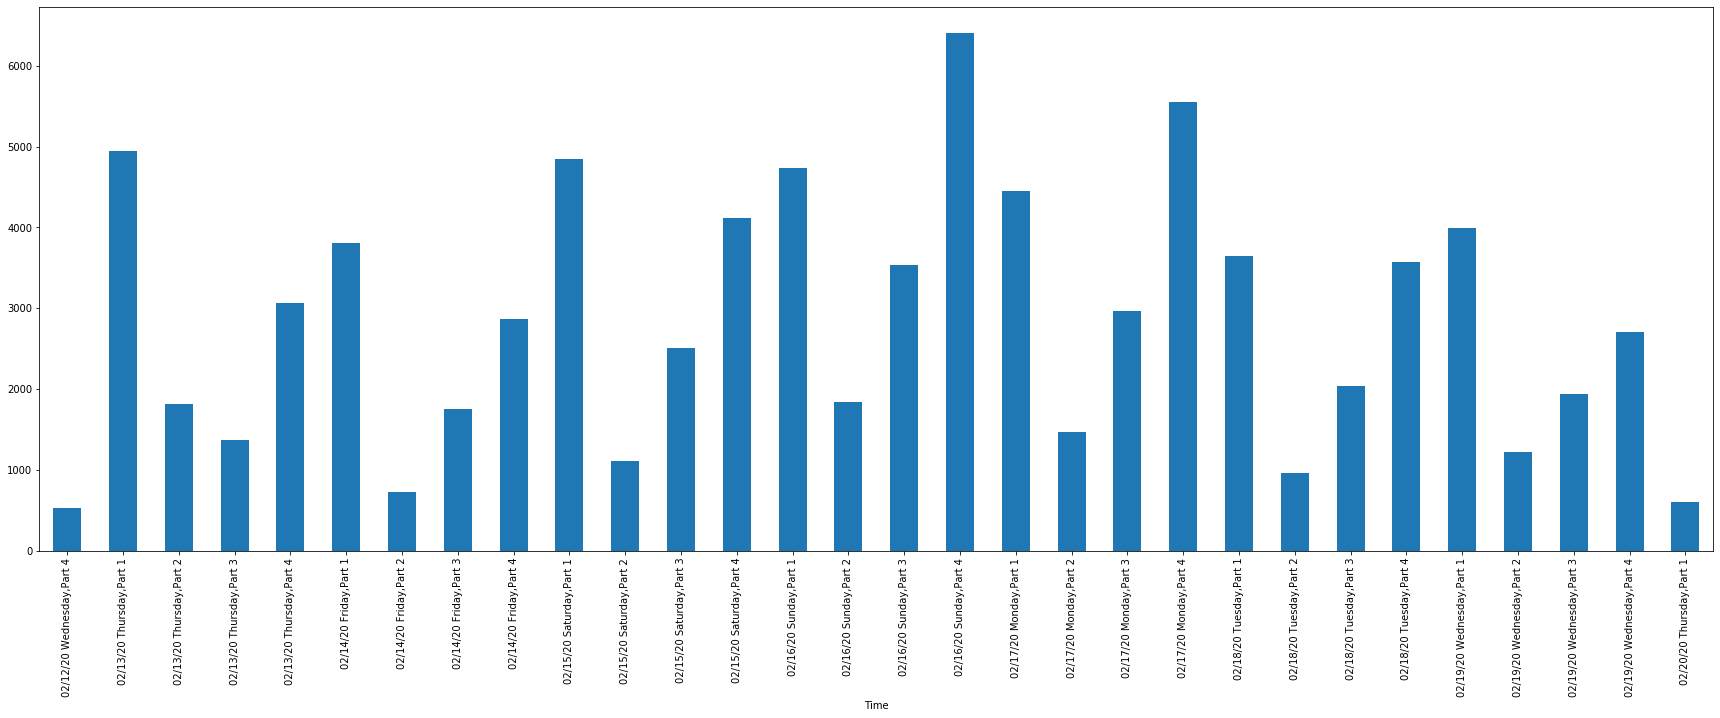

In [159]:
arima_df=pd.DataFrame()
mean_comment=pd.DataFrame()
mean_comment['Time']=arima_df['time']=df_final['Bin Time'][0]
arima_df['comment']=df_final['Diggcount List'][0]
mean_comment['Per Change']=arima_df['comment'].diff()
mean_comment=mean_comment.groupby('Time')['Per Change'].sum()
mean_comment.plot.bar(figsize=(30,10))


In [15]:
from statsmodels.tsa.ardata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYkAAAEGCAYAAACQO2mwAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjEsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy8QZhcZAAAgAElEQVR4nOy9eXxb1Z3w/T2SLMm2LO97FjuJkzgsSSBNUpa0rCG0ELrwlj7tkOGhZZ4p09LpSjszLzNlOg+0naGlU9qhhSmdt4W2dCFQlqYBChRICJAESBzbZHViy3a8SF4kW9Z5/7j32oojWYu1XCvn+/n4I+no3Ktzrav7u79dSClRKBQKhSISlmwvQKFQKBTmRQkJhUKhUERFCQmFQqFQREUJCYVCoVBERQkJhUKhUETFlu0FpJKKigrZ0NCQ7WUoFArFnOL111/vlVJWRnovp4REQ0MDu3btyvYyFAqFYk4hhDgS7T1lblIoFApFVJSQUCgUCkVUlJBQKBQKRVSUkFAoFApFVJSQUCgUCkVUlJBQKBQKRVSUkFAoFApFVJSQUChyECklv951DP/4RLaXopjjKCGhUOQgrZ4hvvzoXp5+uyvbS1HMcZSQUChykIGRMQB6fIEsr0Qx11FCQqHIQXz+IAC9w0pIKGaHEhIKRQ7iC4wDcHJoLMsrUcx1lJBQKHIQQ5M4OaQ0CcXsUEJCochBJoXEsNIkFLNDCQmFIgfxjipzkyI1KCGhUOQgXsNxPRRASpnl1SjmMkpIKBQ5iM+vaRKBYIjhMZVQp0geJSQUihzE8EmAcl4rZocSEgpFDuLzj2MR2vNeJSQUsyAtQkII8fdCiHeEEG8LIR4WQjiFEI1CiB1CiDYhxC+FEHZ9rkN/3a6/3xC2n6/p4weEEBvTsVaFIhfx+oPUl+YD0Kuc14pZkHIhIYSoBz4HrJFSng1YgRuAu4F7pJRNQD9ws77JzUC/lHIJcI8+DyHECn27s4CrgPuEENZUr1ehyEV8/nEaygsBFeGkmB3pMjfZgHwhhA0oADqBS4FH9fcfAq7Tn2/WX6O/f5kQQujjj0gpA1LKQ0A7sDZN61UocgqfP0hjhSEklLlJkTwpFxJSyuPAd4CjaMJhEHgdGJBSGt60DqBef14PHNO3Derzy8PHI2yjUCiiEJwIMTI2QXmhgyKnTSXUKWZFOsxNpWhaQCNQBxQCmyJMNYK3RZT3oo1P/7xbhBC7hBC7enp6klu0QpFDDAW0e7Eip40Kl0M5rhWzIh3mpsuBQ1LKHinlOPBb4AKgRDc/AcwDTujPO4D5APr7xUBf+HiEbSaRUt4vpVwjpVxTWVmZhsNRKOYW3tEpIVFeaFc+CcWsSIeQOAqsF0IU6L6Fy4B9wHPAR/U5W4DH9Odb9dfo7z8rtRTRrcANevRTI9AE7EzDehWKnMKrJ9IVOfMod9k5qcqFK2ZBOnwSO9Ac0G8Ab+mfcT/wVeALQoh2NJ/DA/omDwDl+vgXgNv1/bwD/ApNwDwN3CqlVKmjCkUMjEQ6d75mblKahGI22GJPSRwp5R3AHdOGDxIhOklK6Qeuj7KfbwLfTPkCFYocxijJ4XbmUe5y0DcyxkRIYrVEcvMpFDOjMq4VihzD0CQ0x7UdKaF/RGkTiuRQQkKhyDF84T6JQgegSnMokkcJCYUix/CGaRLlLjugsq4VyaOEhEKRY/j84+TnWcmzWqjQhYTSJBTJooSEQpFj+PxBipxaTIphblKahCJZlJBQKHKMcCFRnJ+H1SJUroQiaZSQUChyDK9/nCJnHgAWi6BMZV0rZoESEgpFjuEN0yQAygvtqqeEImmUkFAocgyffxy3rkkAWta1MjcpkkQJCYUix/D5g7jzpzSJCpcyNymSRwkJhSLH8IX5JADKXQ7VeEiRNEpIKBQ5xFgwhH88RJEjzCfhsjM8NsHomKqPqUgcJSQUihxiqiRHmLlJleZQzAIlJBSKHGKquF+4uUkvzaHamCqSQAkJhSKHmOolcapPAlB+CUVSKCGhUOQQkcxN5YWqyJ8ieVIuJIQQy4QQu8P+vEKIzwshyoQQ24QQbfpjqT5fCCHuFUK0CyH2CiHOC9vXFn1+mxBiS/RPVSgUcGoFWAPD3NSrciUUSZCO9qUHpJSrpJSrgPOBEeB3aG1Jt0spm4Dt+muATWj9q5uAW4AfAgghytC6261D62h3hyFYFApFZLxhXekMCuw2CuxWpUkokiLd5qbLgHellEeAzcBD+vhDwHX6883Az6TGq0CJEKIW2Ahsk1L2SSn7gW3AVWler0Ixp/FF0CRA0yaUT0KRDOkWEjcAD+vPq6WUnQD6Y5U+Xg8cC9umQx+LNn4KQohbhBC7hBC7enp6Urx8hWJuYfgkXI5pQqLQoaKbFEmRNiEhhLAD1wK/jjU1wpicYfzUASnvl1KukVKuqaysTHyhCkUO4fMHKbRbsVlP/WlXuFSRP0VypFOT2AS8IaX06K89uhkJ/bFbH+8A5odtNw84McO4QqGIwvSSHAYVqjSHIknSKSQ+zpSpCWArYEQobQEeCxu/UY9yWg8M6uaoZ4ArhRClusP6Sn1MoVBEwTetTLhBuctO3/AYodBpyrhCMSOnn00pQAhRAFwB/E3Y8F3Ar4QQNwNHgev18SeBq4F2tEiomwCklH1CiDuB1/R535BS9qVjvQpFrqA1HIogJAodBEOSwdFxSvW8CYUiHtIiJKSUI0D5tLGTaNFO0+dK4NYo+3kQeDAda1QochGfP0hZBCEwVZojoISEIiFUxrVCkUNo5qbIPglAOa8VCaOEhEKRQ/iimZtcqjSHIjmUkFAocojp/a0NyvVy4aqNqSJRlJBQKHIE//gEY8HQKSU5DEoL8hBCmZsUiaOEhEKRI0yWCY+gSdisFkoL5kZpDq9/nOBEKNvLUOgoIaFQ5AhTZcJP1yRAKxludp9EKCS59DvP89OXD2d7KQodJSQUihwhWnE/g3KX3fQ+ib6RMXqHxmjp8mV7KQodJSQUihwhUuvScMpdDtNrEt1eTYh1DfqzvBKFgRISCkWO4I3QlS6cSpeDXpP7JDw+TTicGBzN8koUBkpIKBQ5guGTCO9vHU55oR2vP0ggOJHJZSVEt1cTEl2DfrRiDIpso4SEQpEjxPZJaLkSfSbuK+HRzU0jYxOTrVgV2UUJCYUiR/D6gwgBLnt0xzWYO+va453yRSi/hDlQQkKhyBF8/nFcdhsWS6R+XVrjIcDUfoluXwChL79T+SVMgRISCkWOEK2XhMFkaQ4TaxLdXj+LK10AdCpNwhQoIaFQ5Aje0chd6QzCy4WbFY83wDn1xViEEhJmQQkJhSJH8PmDuPOjaxIuhw27zWJaTWIiJOkZClBX4qSyyEGXMjeZgrQICSFEiRDiUSFEixBivxDivUKIMiHENiFEm/5Yqs8VQoh7hRDtQoi9QojzwvazRZ/fJoTYEv0TFQqFLzCzJiGEoKLQbtoifyeHA0yEJNVuJzXF+UqTMAnp0iS+BzwtpVwOrAT2A7cD26WUTcB2/TXAJqBJ/7sF+CGAEKIMuANYB6wF7jAEi0KhOJ1YPgnQs65Nam4ysq2ripzUup0quskkpFxICCHcwAbgAQAp5ZiUcgDYDDykT3sIuE5/vhn4mdR4FSgRQtQCG4FtUso+KWU/sA24KtXrVShyhfiEhHmL/HXr2dbVbgc1xU6lSZiEdGgSi4Ae4L+FEG8KIX4ihCgEqqWUnQD6Y5U+vx44FrZ9hz4WbfwUhBC3CCF2CSF29fT0pP5oFIo5gJQypuMatAgns5YLNxLpqtxO6kqcDAWCk1nkiuyRDiFhA84DfiilXA0MM2VaikSkoG45w/ipA1LeL6VcI6VcU1lZmcx6FYo5j388RDAkIzYcCqeiyE7v8JgpS14YiXSVLgc1xfmASqgzA+kQEh1Ah5Ryh/76UTSh4dHNSOiP3WHz54dtPw84McO4QqGYhi9GcT+DikIHY8EQvoD5Sl54vAHKC+3YbRZqi52ACoM1AykXElLKLuCYEGKZPnQZsA/YChgRSluAx/TnW4Eb9Sin9cCgbo56BrhSCFGqO6yv1McUCsU0vDHqNhmYuTRHt9dPlVsTDjX6o9Ikss/MZ1TyfBb4uRDCDhwEbkITSL8SQtwMHAWu1+c+CVwNtAMj+lyklH1CiDuB1/R535BS9qVpvQrFnGayAmwsn4TLyLoO0FhRmPZ1JUK3L0C1W1tftduJEKpkuBlIi5CQUu4G1kR467IIcyVwa5T9PAg8mNrVKRS5R9yaRKFRv8l8moTH62dFrRsAu81ChcuhNAkToDKuFYocIFYvCYMKQ5MwWa5EcCJE71CAKl2TAKhVYbCmQAkJhSIHiNVLwqCs0Jw+iZPDY4Qkkz4J0PwSSpPIPkpIKBQ5wFR008yahN1mwe20mS5Xwgh/rS6arkkon0S2UUJCocgBfP4gFgGFdmvMuRUuB70m605nlOSoDtckivPx+oMMmzBc90xCCQmFIgfwjo7jctgQInLDoXC00hwm0yQmS3JMCYm6EpUrYQaUkFAocgCtTPjMpiYDrTSHuTQJj1frSGd0zwOVK2EWlJBQKHIArz8Y0x9hUFFk56TpzE1+ygsd2KxTl6RavTSH8ktkFyUkFIocwOcfjxnZZFBe6KB/ZIzgRCjNq4ofj9c/mUhnYITDKk0iuyghoVDkAD5/EHecQqLCZUdK6BsxjzahZVs7Txlz5lkpL7RzQgmJrKKEhEKRA8TqShfOVGkO8wgJjzdwmiYBUFviVG1Ms4wSEgpFDuAdjV+TKDdZQt34RIiTwwGqipynvVfjVm1Ms40SEgrFHEdKyVAgfsd1uclKc/QOBZCSU0pyGNQWO+nyKiGRTZSQUCjmOCNjE0yEZNyOayPM1CxF/oyOdNWRNIliJwMj44yOTWR6WQodJSQUijnOVN2m+DQJtzMPm0WYJqFusiSH+3QhMdV8SPklsoUSEgrFHCfernQGFougrNBuGp9Et88oyRHJ3KTamGYbJSQUijmON0EhAZpfwiw+iW6vH4uY8pWEo9qYZp+0CAkhxGEhxFtCiN1CiF36WJkQYpsQok1/LNXHhRDiXiFEuxBirxDivLD9bNHntwkhtkT7PIXiTMZoOBRvWQ7Q/BLm8Un4qXA5sFpOrztVowsJ5bzOHunUJC6RUq6SUhod6m4Htkspm4Dt+muATUCT/ncL8EPQhApwB7AOWAvcYQgWhUIxheGTiDcEFrQwWLNoElqOxOn+CNAS6koL8jgxoHwS2SKT5qbNwEP684eA68LGfyY1XgVKhBC1wEZgm5SyT0rZD2wDrsrgehUKpJQMjoxnexkzEm8viXAqXA56febRJCL5IwxqivOVTyKLpEtISOCPQojXhRC36GPVUspOAP2xSh+vB46Fbduhj0UbPwUhxC1CiF1CiF09PT0pPgzFmc7zB3o4/1+38ebR/mwvJSrxdqULp9zlYHR8gpGx7Pdq6PEFTulIN5061cY0q6RLSFwopTwPzZR0qxBiwwxzIxXAlzOMnzog5f1SyjVSyjWVlZXJrVahiMIbR/sJhiT/96kWpDzt9DMF3tFxrBZBfl7shkMG5S5zZF2PBUOcHB6LmCNhUKMS6rJKWoSElPKE/tgN/A7Np+DRzUjoj9369A5gftjm84ATM4wrFBmj1eMDYOehPp470B1jdnYwivvF03DIYCqhLrt+iZ6h6OGvBrXFTvqGx/CPq4S6bJByISGEKBRCFBnPgSuBt4GtgBGhtAV4TH++FbhRj3JaDwzq5qhngCuFEKW6w/pKfUyhyBitniEub66mobyAu586wETIfNqEViY8fn8EaOXCIfuahJFIF6kkh0GNypXIKunQJKqBl4QQe4CdwB+klE8DdwFXCCHagCv01wBPAgeBduDHwGcApJR9wJ3Aa/rfN/QxhSIj+McnOHJymLPq3Hx543IOeHz85o2ObC/rNHz+YEL+CAgzN2U5wqnbEBIzmJvqVK5EVknszIoDKeVBYGWE8ZPAZRHGJXBrlH09CDyY6jUqFPHQ3j1ESMLS6iKuPqeGlfNLuGdbK9eurMOZgP0/3SQlJHRNItu5ElPZ1jP7JAC6vCoMNhuojGuFIgpt3Zo/YlmNCyEEt1+1nM5BPz99+XB2FzYNbxLmpny7lUK71RTmJqtFTJYvj0SN0iSyihISCkUUDnQNkWcVLCwvBOC9i8u5ZFkl9z3XzoCJurppjuvEhASYozSHxxugqsiBJUK2tUGB3UZxfp7ySWSJM1JISCl5ZOdRnjdptIrCHLR6fCyudJFnnfqZfHXTcnyBID94rj2LKzsVbwL9rcMpd2W/yJ/H66eqKLrT2qC22MmJASUkssEZKSSEEPzoz+/y8M6j2V6KwsS0enw0VRedMra8xs1HzpvHQy8foaN/JEsrmyIU0hoOJVKSw6C80JH1ENhu78yJdAZa8yHlk8gGZ6SQAFi9oJQ3jg6YNkFKkV2GA0E6+kdZVu067b2/v2IpCPiPba1ZWNmpDI8FkTKxkhwGZijy5/HNXJLDQJXmyB5nsJAooccX4IQ68TLC4d5hfvO6+cJHo9HWPQRwmiYBUF+Sz00XNPC7N4+z74Q300s7hWRKchhUuBz0DQcIZSn3IxCcYGBkfMZsa4PaYie9Q2MEgiqhLtOcuUJivlZQ1sw1eXKJn7x0kC/+eg9HT2bfRBMPrV16ZFMEIQHwmfcvwe3M4+6nWzK5rNMwekkkUibcoNxlJyRhYDQ7BQy7vbHDXw2MCCdjG0XmOGOFxPLaIhw2C7uPDmR7KWcErV3anfnje+dGZZVWjw+HzcL8soKI7xcX5HHrJYv5c2sPL7f3Znh1U8xGkzCa/GSrjWm3T9PiK+MwNxnNh1TJ8MxzxgqJPKuFc+qLefOYEhLpRkrJAb0G0uN75oaQOODx0VTtitgIx+DG9zZQV+zkrqdbsmaySaZMuEFFoVG/KTt+CY+hScRlbtJLc6hCfxnnjBUSoPkl3jo+yFgwlO2l5DQ9vgCDo+Msriykpcs3WTTPzLR5hlhaFdnUZODMs/KFK5ext2OQP7zVmaGVnUpKNIks5UoYdZvic1ybP6Hud292sG2fJ9vLSDlnuJAoZSwYYn9ndp2PuY6hRdx2+VIswvzaxODoOF1eP0trZhYSAB9aXc/ymiK+/cyBrNxseGclJLJbLrzbFyDPKigtiJ5tbeBy2Chy2kwd4XTPtjbuemp/tpeRcs5wIVECKOd1ujmgO4EvXFzOBYsr2LrnhKlDj9s8Mzutw7FaBF/dtJyjfSNZybvx6k7nZDKuSwvsCJE9n4SWSOecMds6nNpiJ52D5vRJTIQkJwZGebdnmOM55jc5o4VEbXE+NW6n8kukmVaPj/JCO+UuB9eurOPIyRH2dgxme1lRMTSfpgg5EpF4/9JK1i8q497tbZM+gkzh8wexWy1JFRy0WgRlBXZ6h7OkSXgDM5YIn05Ncb5pzU0er5+g7pd6sTW3OmSe0UICNG3iTRXhlFZaPUMs1e/KN55VQ55VmNrk1OYZotBupb4kP675Qgi+tqmZk8Nj/PiFg2le3an4kizJYaCV5simJhG/kDBzG9Nw7eGFNiUkcorVC0o42jeS9fIEuUooJGnz+Fim2/eLC/J439IqntjbmbWIoFgc6NLKcSTS6W3l/BI+cG4tP37x0GSPhEyQTJnwcMoLHVnzSXi8/rhyJAxqip30DgVMGWhilGhZs7CUl9p6TdmcKlnSJiSEEFYhxJtCiCf0141CiB1CiDYhxC+FEHZ93KG/btffbwjbx9f08QNCiI3pWOfqBVpSncqXSA/HB0YZHps4xXRz7ao6urx+dh42Zw+ptm5fXP6I6Xz5ymWMT4T47va2NKwqMsl0pQun3GXPyg2Sf3wCrz+YkJCoLXYi5VR+hZno6NM0iRvWLsDrD7KnI3euJ+nUJG4Dwl39dwP3SCmbgH7gZn38ZqBfSrkEuEefhxBiBXADcBZwFXCfECLlnV7OrivGZhG8eUw5r9PBZE+GsIvu5c1V5OdZTWlyOjkUoHdoLG5/RDgNFYX8r3UL+OVrx3i3ZygNqzsdrz+IOz95TaLClR1NwsicTsTcZOY2ph39o1QWObhseRVCwAs55JdIi5AQQswDPgD8RH8tgEuBR/UpDwHX6c8366/R379Mn78ZeERKGZBSHkJrb7o21WvNt1tprnUrv0SaONB1eg2kAruNy1dU8+RbnYxPmMt00OrR1rssjvDXSHzusiacNgvfeeZAKpcVFZ9/nCJH8ppEhcuOLxDEP57Zmkgen5EjkZgmAZiy3lrHwAjzSvMpLbRz7rwSXmzLXhZ+qkmXJvFd4CuAcQUoBwaklEH9dQdQrz+vB44B6O8P6vMnxyNsk1JWLyhhz7GBOWFHfKmtl6ffzk7iVjK0enzUFjspnlZb6NqVdfSPjPNSFktaRMJI9FuahLkJtDvzT29YxFNvd/FGBkKrZ+2T0BPq+jIc4WQk0iUS3WQIiS4ThsF29I8yr1Qr4bKhqYLdxwYYzFJNrFSTciEhhPgg0C2lfD18OMJUGeO9mbYJ/7xbhBC7hBC7enqSU/FWLyhheGxi0jRiZv592wH+8fdvmzrPIJxIPRkANiytwO20mc7kdMDjozg/LyEzyHQ+ffEiKlwO7nqyJe3fkyYkZuGTKMxOQl0iJTkMipx5uBw200U4hfQcCSMabsPSSiZCklfeNdcNULKkQ5O4ELhWCHEYeATNzPRdoEQIYdzyzAOMq0MHMB9Af78Y6Asfj7DNJFLK+6WUa6SUayorK5Na8FRFWHObnEIhyYEuH71DY7zbM5zt5cRkIiRp6x6K2JPBYbNy1dk1/PEdT8ZNHTPR5vGxtNqVUGTTdAodNm67vImdh/t4tiV93Q8n9IZDqdAkejNcmqPb68dutVBSkJiAqyl2ms4n0e0LMD4hmVeqCYlV80twOWz8uVUJiYhIKb8mpZwnpWxAczw/K6X8BPAc8FF92hbgMf35Vv01+vvPSu32aytwgx791Ag0ATtTvV6AheUFlBbkmT7C6Vj/CCNj2gV15yFzRgaFc+TkMGPBUFTTzbUr6xkKBHkujRfSRJBSE8LJmprCueE982msKOTup1vSZsYcmkVJDoOKLJXm6PZpiXSJCuNaE+ZKGOGvhpDIs1q4YHE5L7T2zBmNfyYymSfxVeALQoh2NJ/DA/r4A0C5Pv4F4HYAKeU7wK+AfcDTwK1SyrTccgohWDW/xPQRTvs7NXOYRcCOQyezvJrYGE7gaBfd9YvKqHDZTVM+vNsXwOsPpkRI5FktfHnjMlo9Q/zmjfQ0W5pNLwmDbJULTzRHwqDGbb7SHB392noMnwRoJqfjA6Mc6jW/xh+LtAoJKeXzUsoP6s8PSinXSimXSCmvl1IG9HG//nqJ/v7BsO2/KaVcLKVcJqV8Kp1rXb2glLbuockfnhlp6fIiBFy6vIodB/tMf5fSGqO8hc1q4QPn1LJ9f3fGy1lEwqgxlQohAbDp7BpWzi/hnm2taTGpGRVgk+lvbVBot+KwWTiZBcd1PNVfp1Nbkq+bd8wTFTddkwDY0KSZvnMhFPaMz7g2WL2gBClh7zET1xTq8tFQXsj7llXR5fVztM/cXd4OeHwsKCugwB79InbtqjoCwZApSixPRTYlniMRCa1cx3I6B/389OXDKdlnOLPpJWEghKDC5ch4Ql23N0BVAk5rAyOhrsdnngoJHf2jVLgcp9TPWlBeQEN5AS/kQCisEhI6K+eXIIS5K8K2dPlYXlPEusYyAHYcNLdfwnACz8Tq+aXUl+SbIsqp1eOjwmWfNMGkgvWLyrl0eRX3PdfOwEhq79Zn00siHK1+U+Y0iZGxIL5AMKHwVwMz9pU4PjBKfenpdb42LK3klXdPzvm+3EpI6LideSypdJm2IuzIWJDDJ4dZXuOmqcpFWaGdHSZ2Xo8FQxzsGY5purFYBB9cWcuLbb30Z6kaqUGrZ4imGI2GkuErVy3DFwhy3/PvpnS/vsDsNQnQwmAzqUl0JxH+ajCVK2EeIaHlSJwuJC5uqmR0fILXj5j3xjMelJAIQ6sI229KW3+rZwgptd7cQgjWNpSZ2nl9qHeYYEjGlbl87co6giHJk1lMEpTy1EKEqWR5jZuPnDePn758OKW9Bryjs/dJgOa8zqQmMdWRLgkh4dYuxmZxXodCkuNRhMR7F5djswhemOOhsEpIhLF6QSn9I+McOWk+W3+L3j2vucYNwLpFZXT0j5q2wUkimcsrat0sqizMqskpUiHCVPL3VywF4N//mLpyHanwSYBubhoOZOzmyKP7E5JxXLvzbRTYraYxN/UMBRibCJ0S2WTgctg4b2EpL87x0uFKSIQx2anOhKGwLV0+CuzWyTuWdY3lAOw4aE5totXjw2oRLKosjDlXCMG1K+vYcagva2aE1gS60SVDfUk+N13QwO/ePJ6ydrk+fxCHzYLdNrufcaXLwfiEnGyFmm6MUurJOK6FEKZKqIsU2RTO+5ZW8s4Jr6kc7YmihEQYTVVFFNqtpsy8bunysqymaLLV47KaItxOm2mT6rRIrAIctvgK916zsg4p4Yks5UwYOR2RSoikir99/2KKHDbufrolJfvzzrIkh8FUr+vMXMg8Xj8OmyXp6rVmamNq5EjMjyIkjFDYl9rnrjahhEQYVotg5XzzdaqTUuqRTe7JMatFsLaxzLTO67buoYTs+4srXZxV5+bxvdnxS7R2+ahxn16IMJWUFNi59ZIlPH+gh5dTUNfH5x+ftT8CtMZDQMZyJbp9AardzqRLn9S4zdPG1BAS9SWnm5sAzqpzU1Zo58U57JdQQmIaqxeUsL/Ty+iYecLWPN4AAyPjNNeeetFd11jOod7hjHZCiwf/+ASHTw4nHCl07co69hwb4MjJzGeptnb7WJoGp/V0tlzQQF2xk7ufmn3xP68/SFEKhFo2NIlk/BEGtcVOun0BgiZIqOvoH6W80E6+PbLGbLEILlpSwQttvabtxBgLJSSmsXp+KcGQ5O0T5kmq29+l2bDDNQnQnNcAr5pMm2jv1iKxEo0U+uDKOoCMO7AnQpI2zxBLq9LjtA7HmWfl769Yyp6OQZ58q2tW+0qVJlFhFPnLUIRTtzdAVRKRTQa1JRAF6YcAACAASURBVE4mQjJj652Jjv6RqP4Ig4ubKugdCkz+jucaSkhMY5XhvDZRUp1RLmK6U3VFrRuXw8ZOk4XCJlveor4kn/c0lPL4nsyanI72jRAIhjKiSQB8+Lx5LKsu4tvPtMyqvMRse0kYlBZktsifx+tPKkfCoHYyoS77fonjYX0korFhqeaXmKuNiJSQmEaFy8H8snxT+SVaOr3UFTspnlZW2Wa1cP7CUtNlXrd2+7BbLTSUz/zjicQ1K+s44PFNCppMMNtGQ4litQi+umkZh0+O8MjOo0nvZ7Zd6QzsNgvF+XmczEC58KFAkOGxiaSyrQ1q3OZoYxoKSToGIudIhFPtdrK8pmjO1nFSQiICq+eXsttEmdctXT6W17ojvrduURlt3UMZr+I5E61dPhZVFmKzJn56XX1OLVaLYOue42lYWWRadYHUlAFzk8Ely6pY11jG97a3MRxILvQ0VZoEZK40x1Qi3ex8EpD9Nqa9QwHGgqGYQgI0k9Ouw/2MjGUmzDiVKCERgdULSugc9JtCnR0LhmjvHmJ5FFOIkS9hplDYVk9ikU3hVLgcXLC4nMf3dGYsuau1e4h5pfkUOlJzwY0HIQS3XdZE79BYUi1cxydCjIxNzKpMeDgVhQ56MnCjMZuSHAYlBXk4bJastzE9FqFEeDQ2LK1kbCJkOq0/HpSQiMDqBVqnOjM0IXq3Z4hgSEbVJM6pLyY/z2qaUFiff5zjA6OzMt1cs7KOo30j7OnITPBAa5cvbUl0M7FqgVZUMpnkulQ0HAqn3GXPSMJXt8/obZ28kBBCUFeS/TBYo9pBpOJ+03lPQxkOm4U/z0GTkxISEVhR68Zus5ii2J9hm4+mSdhtFs5bWGIaIdHWPXOjoXjYeFYNdquFx3an3+Q0PhHiYO9QWpPoolFgt9FYXpiUkJiqAJsaTWL1ghIO9Q6z63B6z6NUmJtAaz6UjE9i654TvJOiyEUj29robT0Tzjwr6xaVz8kSHSkXEkIIpxBipxBijxDiHSHEv+jjjUKIHUKINiHEL4UQdn3cob9u199vCNvX1/TxA0KIjaleazTsNgtn17lNEeG0v8uL3WqhsSJ6eYt1jeW0dHkZHMl+457WKJFYiVCcn8clyyt5Ym9n2lp/GhzuHWZ8QrKsJnP+iHCaa92THQcTwTtZtyk1msQn1y+kwuXgW08fSKuZz+MNkJ9nxTVL014ybUzfPj7IbY+8yfe3t8/qsw06+kcpK7THbabc0FTBuz3Dpq23Fo10aBIB4FIp5UpgFXCVEGI9cDdwj5SyCegHbtbn3wz0SymXAPfo8xBCrEDrkX0WcBVwnxAivhoPKWD1glL2dgxmvQNWS6ePJVUu8mZwAq9rLENK2Jnmu8B4aPUMkZ9njcuZNxObV9XT4wukvTbVZDmONJQIj4fm2iKO9o0k3JkvVb0kDArsNm67bAk7D/fxfBpNIkYiXbLZ1gY1xU48Xn/cNxFSSr7x+D6kJGX5CtFKhEfDCIWda1FOKRcSUmNIf5mn/0ngUuBRffwh4Dr9+Wb9Nfr7lwntDNoMPCKlDEgpDwHtwNpUrzcaqxeUEAiGaEniLi+VtHR5WV478wVs5fwS7DaLKYr9tXp8NFW7JmtMJculy6twOWw8tju9iXUHPD4sApZkMLIpnGbd19SSYMivIVTcKTI3AXzsPQuYX5bPt58+kLbs4G7f7BLpDGqLnQRDMu6oviff6mLn4T4WVxZy5OQIQ0lGlIUTTyJdOE1VLmrczjlnckqLT0IIYRVC7Aa6gW3Au8CAlNL4ZjqAev15PXAMQH9/ECgPH4+wTfhn3SKE2CWE2NXTk7p/vuG8zmZF2L7hMTzewGR58Gg486ysml9iCk3igMeXknwDZ56VjWfV8OTbnWnt7NXm8bGwvPCU1pOZxBASifolvJP9rVMnJOw2C1+4Yin7Or384a30JDR2e/1J9ZGYTm2x0VcitsnJPz7Bvz25n+U1RXzlquUAHJilNiGljCuRLhwhBBc3VfBSW68pSorES1qEhJRyQkq5CpiHdvffHGma/hjpllPOMD79s+6XUq6RUq6prKxMdsmnUVfspKrIkdWkuhb9RI4nnHR9YxlvHx9M2GyRSvqHx+jxBVIWKbR5VR0+f5DnD6TvzutAHC1W00ltsZOSgryEhYQvxT4Jg2tX1rOsuoj/2NaaclOrlBKPN0B10ezbwybSxvSBlw5xfGCU//eaFZxdXwzAvllaCHqHxggEQ3E5rcPZsLQSrz+Ysci9VJDW6CYp5QDwPLAeKBFCGGf0PMCwI3QA8wH094uBvvDxCNukHSHEZKe6bDEZ2RTD3ASwblE5IQm7stgq0chcTlXjngsWl1PhsrM1TSYn//gER06OZCzTOhJCCJpr3AlftAyfhCvFQsJqEXxp4zIO9Q7z6OsdKd23LxBkdHx22dYGU21MZ3YCd3v9/OC5djaeVc0FiyuoK3bidtpm3dMjVh+JaFy0pAIhmFMmp3REN1UKIUr05/nA5cB+4Dngo/q0LcBj+vOt+mv095+VWnjFVuAGPfqpEWgCdqZ6vTOxekEph0+O0Jel3sstnT7KC+1UumL/qM5bUEqeVWQ1WWeycU+KaiDZrBY+cE4tf9rvSYuGdLBnmImQzKqQAM3kdKDLm1Akl88/Tn6edcaAhmS5vLmK8xaU8L0/teEfT52pr3sWbUunU1Zox261xNQkvvXMAYITkq9frRkzhBB6RNlshUT8iXThlBbaObe+eE45r9OhSdQCzwkh9gKvAduklE8AXwW+IIRoR/M5PKDPfwAo18e/ANwOIKV8B/gVsA94GrhVSpnR+t2r52vF/nZnyS9hOK3jiQTJt1s5d15JVov9tXqGKHLaqEnBRcDg2lX1BIIh/viOJ2X7NGjrzmzNpmg01xbhHw9xqDf+EumpLMkxHSEEX964nC6vn/955UjK9mtkWyfTkW46Roe6mYTEWx2DPPp6Bzdd1MDC8qkQ8uZaNy2dvlmFV0/2kUgiim/D0kp2HxswRch6PKQjummvlHK1lPJcKeXZUspv6OMHpZRrpZRLpJTXSykD+rhff71Ef/9g2L6+KaVcLKVcJqV8KtVrjcU584qxWkRW/BITIckBj++08uAzsbaxjL0dg1mrD2M4rWcb3hjOeQtKmFeaz2NpKB9+oMuHzSJmzEHJBCvqEndee/3jKSvJEYn3Li7n4qYKfvB8+2ROxmzx+FKTSGdQO0MbUykl//L4O1S47PzdJUtOeW9FrZvR8YlZ9S3p6B+htCAvqXyPDUsrCUlS0ngqE6iM6xkosNtYVl2UFSFx5OQw/vFQQqabdY1lBEOSN45kfr1SSlpTFNkUjhCCzavq+Et7b8rLRrR6fDRWFM66R/RsWVLlwmYRCQmJdGoSBl/ZuJyBkXF+8sLB2JPjwGNoEinSNGuLnXR6I/skntjbya4j/XzpymWnZaVPRZQl77zuSDCyKZxV80twOWy8MEf8EkpIxGD1ghL2HBvIeFcpw2kdK/w1nDUNZVgtgh1ZMDn1DGnd85alIVJo86p6JkKSJ1McltnqGcpYD4mZcNisLKlyJahJpKa/9UycM6+Yq8+p4ScvHaI3BcX/PF4/Lodt1tnWBjXF+XgGA6f9Nv3jE9z1VAsrat1cv2b+ads1VbuwJiiUp3N8YDThyCaDPKuFCxaX80Jrb8aKWM4GJSRisHpBKb5AkHd7hmJPTiH7u7Qkr0QihVwOG2fXubNSx6m1S6/ZlIaL7tLqIpbXFKW0ltPIWJCjfSNZKewXiUTLc/j842nXJAC+cMUy/OMT/OC52Zey6PYGqEpB+KtBbbGTsYnQab25f/zCwcmQV2uEpE5nnpXFlcnVzAJNa040kW46Fy+t5PjA6Ky0mUyhhEQMVk92qsusCael00tjReJJXmsby9h9bCClUSnxcCDNjXs2r6rnjaMDHD05kpL9tU8WIsxejkQ4zbVFdHn9cUfS+fzBlLQujcWSKhfXnz+fn796dDLsM1k8Xn9Kwl8NaibDYKf8Eh6vn/uef5dNZ9ewflF51G1nE+F0cngM/3h8fSSisensGtxOG/+89R3T975WQiIGjeWFFOfnZTzzeqZGQzOxrrGcsWAo402T2jxauG5FHOG6yXDNyloAHt+bGgd2si1W08WKWi3JK94Ll3d0PKXZ1jNx2+VNIOB7f2qb1X66fYGUhL8a1E1mXU/5Je5+uoWJkORrmyLl707RXOvmxKCfgZHEw9uTDX8Np8Ll4B8/uIKdh/v4+Y7URZClAyUkYmCxCFbNL8moJjEU0Ewhy5O4gL2nsQwhyHi+RKrKcURjXmkB72ko5fdvHk+JHbetewi7zXJKaGQ2adYTJuMREmPBEIFgKCPmJoC6knz+av1CfvNGB+3dyZlHtGzr1JTkMJjUJPT8iz3HBvjtG8e5+eJGFsRonTsb5/VkIl3Z7IpYXn/+PC5uquCup1pMXRlWCYk4WL2ghAMeX8ZKXhhJacloEsX5eTTXuNl5OHPOayklrV3pL29x7ap62rqHEi6GF4kDXT6WVLoi2qyzQbnLQVWRg31xCImpkhyZ0SQAPvP+xeTnWfn3P7Ymtb13NEggGEqpT6K80E6eVdA56NeqvD6xjwqXg1unhbxGwhDK8fy/pzOZI5Gk49pACMG/fegcJPD1375lWie2EhJxcOGSCqSEP+xNT9Gz6RiVZ6M1GorFukVlvH6kn7FgZoqIHR8YZXhsIu2RQh84pxabRaSkMmxblms2RaK51s2+E/EIidSWCY+HcpeDT128iKfe7mJvR+JatScFHemmY7EIqt1OOgdG2brnBK8f6ecrG5fFFT1VVeSkwmVPyi9xvH+UkoK8lAjp+WUFfGXjMv7c2sNv38hcX/dEUEIiDtYsLKW51s2DfzmUEWnf0uXF5bAl7Rhb11iGfzzEW8czYyJr03sypDtSqKzQzsVNFTy+58SsnH1e/zgnBv2mCH8Np7nWzbs9QzGFe6q70sXLpy5upLQgj28/cyDhbSc70qVQkwAtwulQ7zB3P9XCWXVuPnr+vLi3TdZ53dE/MmstIpwb39vA+QtL+cYT+zLSQjZRlJCIAyEEn7qokVbPEC+2pT9LsqXTx/Ka5DOX1zZqUR2vZsgvcWCysF/6L7qbV9VzfGCU12dReNEQakuz1GgoGivq3IxPyMnIq2h4J3tJZE6TAE0o3XrJEl5s6004W9goyZFKnwRoJcP3dAxyYtDPHdeclVAfk+ZaN22eoYSr3SbabCgWFovg7o+cy+jYBHdsfTtl+00VSkjEyTUr66gscvDAS4fS+jlSSvbH0WhoJsoK7SytdmUsX6K1y0eN20lxGstEGFyxohpn3uz6X6e6EGGqWBGn8zobPgmDT65fSG2xM+E2p1PmptRrEqCZItc2liW07YpaN2MTIQ72xF+eQ8uRSD7bOhpLqlzcdnkTT77VxdNvZ8asHS9KSMSJ3WbhxvUL+XNrT9IRHvHQOejH5w+yLIFM60isayzn9cN9GWlu0trty5jpptBh4/Lmav6wtzPpfgetHh/5edaUmgxSQUN5IQ6bJaaQ8GbBJ2HgzLNy22VN7D42wIN/ORy3oOj2Bihy2iiwp3bNK+rcFDls3L5pecLbJtPwqW94jNHxiZRqEga3bFjEilo3//TYOxkt/hfrO1RCIgE+sX4hDpuFB146nLbPMBoNNc/yoru2sYzhsQneicMROhsmQpI2z1BaynFEY/OqevpHxnkpSdNfq+60nm2L1VRjs1pYVlMUM+LGl4audInw0fPncenyKu58Yh+3/+atuBI3Ux3+arB5VT27/uly5pclfme/qLIQuzW2UA4nFTkS0cizWvjWR8+lb3iMO/+wL+X7j0asbHolJBKgrNDOh8+r57dvdKStx4QRtz3bO/N1izTVO911nI72jRAIhjLijzB439JKivPzkjI5bd1zgtcO9U92KDMbK3Rn6kx3d4a5KdUNh+LFZrXw4xvX8NlLl/DLXcf42H+9wokYcf4erz+l4a/hOGzJtZ7Ns1poqnYlFAY7JSTSo4WeXV/M32xYxKOvd2Sk58RwIMhPYpjQlZBIkP99YSOBYIhfpClLsqXLx7zS/FnfJVYVOVlUUZj2pLpJ+34GhYTdZuHqc2r44z5P3GXRpZT857NtfO7hN1k1v4QvXbkszatMjuZaN/0j45MVUyPh8wdxOWxZzfGwWgRfvHIZ//VX5/NuzzDXfP8lXj0Y/YbE401ttnWqSDTC6fiAlkiXTB+JePncZU0sqizka799i+FAesv+/2LHUQZimLaUkEiQpuoiNiyt5KFXjhAIpr4+UkunN6EeEjOxblEZOw/3zaq5Sixau1LbsjRerl1Zz8jYBH/a3x1z7lgwxJcf3ct3/tjKdavq+J9PraW00J6BVSZOPHZy72hmivvFw8azavj9rRdSUpDHJ36ygwdeOj1MXEpJjy+Qcqd1KmiuddM7NEa3L3avbNA0CbfTllZTnzPPyrc+ci4nBkeTCjeOF//4BPe/eJCLllTMOC8d7UvnCyGeE0LsF0K8I4S4TR8vE0JsE0K06Y+l+rgQQtwrhGgXQuwVQpwXtq8t+vw2IcSWaJ+ZaW6+qJEeX4An9qQ2CiEQnOBg73DSSXTTWdtYhs8fnHWrxpk44PExvyw/5Q7JWKxtLKPG7WRrDJPT4Mg4Wx7cyaOvd/D5y5u452OrkjZPZILlcWQCZ6KXRCIsqXLx+1sv5PJmzU/x+V/uZnRs6gZqYGScsYkQ1SnoSJdqpsqhxBeMko7IpkisaShjy3sbeOiVw+w6nB5rwK92HaPHF4iZoZ4OTSIIfFFK2QysB24VQqxAa0u6XUrZBGzXXwNsQutf3QTcAvwQNKEC3AGsA9YCdxiCJdtsaKqgqcoV8a5pNrR3DzERkrMKfw3nwiUVOPMs3PVUS9q0Cc1pnflQUqtFcM3KWp4/0EN/FP/Q0ZMjfOiHf+H1I/3c87GVfP7ypSntmpcO3M485pXmzywkAuNZCX+diSJnHj/8xPl8eeMytu45wYd/+PJkxd6pjnTmExIrEoxwmm2J8ET48sZl1BXn85Xf7E15VeexYIgfPf8uaxaWsn7RzKHD6Whf2imlfEN/7gP2A/XAZuAhfdpDwHX6883Az6TGq0CJEKIW2IjWH7tPStkPbAOuSvV6k0EIwf++qJF9nd6UJqxNleNIjbmpqsjJN649m5fae/nPZ2ffD2A6Y8EQ7/YMZa2S6uZV9QRDkqfe7jrtvdeP9HHdfX+hb3iM/7l5LR9aHX8mbrZZEcNObjZNwsBiEdx6yRIe/Ov3cLx/hGv+8yX+3NoT1pHOfOamkgI7dcXOuIREunIkolHosPF/P3wOB3uGuXf77CrwTuf3bx7nxKCfv7t0Scwbp7T6JIQQDcBqYAdQLaXsBE2QAFX6tHrgWNhmHfpYtPHpn3GLEGKXEGJXT0/m2gF+aHU9ZYX2lCbXtXR5cdgsNMSoYJkI16+Zx4dX1/Pd7a283J7abPHDJ4cJhmTWhMRZdW4WVRaydc+pJqfH95zg4z/egdtp43efuZB1M/QVMCPNtW4O9w6fYrIJR+slYS5NIpxLllXx+GcvorbYyV//987JEEszmpsgfud1/8g4I2PpyZGIxoallXz0/Hn81wsHefv4YEr2GZwIcd/z7ZxTX8z7llbGnJ82ISGEcAG/AT4vpZzpG4gkxuQM46cOSHm/lHKNlHJNZWXsA04Vzjwrn1y3gO0tHg73Jt9QPZyWLq3cts2auq9FCMGd153NoopCPvfI7rgddPHQmuZGQ7EQQrB5ZT07DvXROTiKlJIfPNfOZx9+k1XzSvjdZy6kscIcpcATobnWTUhOlTuZjpkc19FYWF7Ibz9zAR88t46deua/GTUJMGpmDcc06Rw3qr9mUEgA/NMHVlBWaOdLv96TErPTH97q5PDJkbi0CEiTkBBC5KEJiJ9LKX+rD3t0MxL6oxGW0gGEN6KdB5yYYdw0fPK9C8mzWPjvv6RGm9jf6UtLqYhCh437PnE+Q4FxPv/I7pT5J1q7fFgtgkWV2bsQX7uqDinht28c58uP7uXbzxwwfQRTLAw7ebSKsL4M9LdOBQV2G/fesIp/vmYFf31BQ8JdFjNFc62biVDsmlmTfSQyLCSKC/K468Pn0NLlm3W0Uygk+c9n21la7eKK5uq4tklHdJMAHgD2Syn/I+ytrYARobQFeCxs/EY9ymk9MKibo54BrhRClOoO6yv1MdNQVeTkmpV1/Pr1DgZHZ5dG3zsUoHcokLLIpuksqyniG5vP5uV3T/L9Z1Nj3zzg8bGwvCCrP/7GikJWzivmO388MGcimGIxrzQfl8MW0QTiH59gbCJzDYdmixCCv76wkX++9qxsLyUqk70lYlQnSGe2dSwua67mr9Yv5IGXDs0qye6P+7po6x7i1kuWxF1xIB2axIXAXwGXCiF2639XA3cBVwgh2oAr9NcATwIHgXbgx8BnAKSUfcCdwGv63zf0MVNx80WNjIxN8MjOo7Paj9FOszmJRkPxcv358/jwefV8b3tbSvwT2Ypsms7H1y4gz2KZMxFMsbBYBM21RRGFxFRJjrkhJOYCC8sLyc+zxsy87ugfochpy0ghy0j8wweaaapy8cVf7+HkUOIlxaWU/Odz7TRWFPLBc+vi3i4d0U0vSSmFlPJcKeUq/e9JKeVJKeVlUsom/bFPny+llLdKKRdLKc+RUu4K29eDUsol+t9/p3qtqWBFnZv3LirnoZcPJ11wDqZC8NKlSYB2V/ev153N4krXrP0TL7T2cPjkcEbLcUTjhrUL2PvPV86pCKZYNNe6aenyndY3wyjJ4c7ShSoXsVoEy2oiC+VwMhnZFAlnnpV7P76awZFxvvqbvQmH3z/f2sPbx7387fsXJ5StrzKuU8DNFzVyYtAfMRQzXlq6fFQWOSh3pde5V2C3cd8nzmMoMM5tDyfunxgKBPnab9/ixgd30lhRyP+zxhwXZrPau5OludbNUCA4aeIwyGYF2FxmRV3smlmp7iORDM21br66aTl/2t/N/7cjfuuFlJLvb2+jviSfD60+LUh0RpSQSAGXLq+isaJwVsl1LV3etGoR4SytLuLOzWfzysGTCcVf/6W9l433vMAvXzvK37xvEX/43MVZvbPKZQyz477OU8Mes9lLIpdprnXj9Qc5MRhZu5ZScnwg+0IC4KYLGri4qYJ/fWJf3G0LXjl4kjeODvB/3reIvASjJ5WQSAEWi+CmCxvYc2yAN5LomBacCNHmGcqYkAC4fs18PnLePO59ti1mye3hQJB//P1bfOInO3DYLPz6/1zA1zY159zdu5lYVl2ERcC+aeUistHf+kxgsuFTFOf14Og4Q4GgKXqQWCyCf79+JYUOG599eHdcNeR+8Fw7lUUOrl8zP+bc0z4vmUUqTucj583D7bQllVx3+KRWbjtVmdbxcud1Z7Gk0sXnf/km3d7Id1CvvHuSq773Aj/fcZRPX9zIk7ddzPkLTVEdJafJt1tprCg8zU6uNIn0YDT5iuaXyGZkUySq3E6+9ZFz2d/p5dtPzxwW+/qRfv7SfpK/2bAoqRs7JSRSRKHDxsfXLeDpt7s41jeS0LZGo6FU1WyKF8M/MRyY4HOPvHmKf2JkLMg/b32Hj//4VaxC8Ou/eS//8IEVSnvIIJEygZUmkR5cDhsLywvY3xVNSGQnR2ImLl9RzSfXL+AnLx3ixbboYbE/eK6d0oI8/te6BUl9jhISKWTLexsQQvDQy4cT2q6lU0tKW1KV2XLboJU+v/O6s3n1YB/f+1MrADsP9bHpey/y0CuHuenCBp66bQNrGhLrH6yYPc21bjr6R0/JwfGOjiMEuDJcdfdMoLnGHTVXwtAk5ptEkzD4h6tXsKTKxRd/tSdiI7S3jw/ybEs3N1/UmHSlZiUkUkhdST4fOKeWX752jKEEmoW0dHlZVFGYtQSwj54/j4+eP4/vP9fO3/3iDT52/ytICY98ej13XHMW+XalPWQDI/O6JUyb8OoNh8zWejUXaK51c6RvJGKjn47+UYocNtz55hLO+XYr37thFQNRwmJ/8Fw7RU4bN17QkPRnKCGRYm6+qBFfIMg3/7CPZ1s8tHR5J+3I0Wjp8rE8jUl08XDn5rNpqnLxxN5Obly/kKc/f/GcK4yXa6yoO91ObvbifnOZ5toipNR+j9Pp6B+lvjTflImaZ9UV85WrlrFtn4dfhCX1tnl8PP1OF399QcOszhlzicUcYOX8Eq5YUc3DO4/x8M6pIrZup4360gLqS5zUl+RTX5pPXUk+5YUOOvpH+fja5OyFqSLfbuUXn15PtzcweXFSZJeqIgdlhfZTGuL4/OYv7jdXCRfK04MzMtlHIhn+94WN/Lm1hzuf2Me6xjKWVBVx3/Pvkp9n5aYLG2e1b3W2pYH/+uT59A4F6BgY5Xj/KMcHRjmhP+/oH2XHwT5801RaM1yYK1wOKtKczKeIHyH08hxdp2oSSkikh/qSfNzO02tmSSk53j/KehNr1kZY7MbvvsDnHt7N925YxWO7j/OpixdRNstCl+psSwMWi6DK7aTK7eS8BZHDRb3+cU2A9I8yFAiyoSlzZc4Vc4fmGjc/e/UIwYkQNqsFX2DctH0Z5jpCCJZHiCjzjgbxBYKm1iRAD4v96Eo+/bNdfOz+V7FZLXzqotlpEaB8ElnD7cyjudbN5SuquW51fUK1VBRnDs21bsaCIQ7pPUu8o0qTSCcrItTMOmbC8NdoXLGimk+sW0Df8Bg3vGc+VSloGavONoXCxBhmyH2dXpqqi3SfhHJcp4vm2iJGxiY42jdCg96wymyJdLH4xw+soKG8kI+en5q6akqTUChMzOJKF3lWwf5OH1JK5ZNIM1M1s6ZMTmZMpJuJfLuVT29YlLKmW0pIKBQmxm6zsKRKK2PtHw8RDEmlSaSRpXrNrHC/xPGBUQrt1qz1kcg2SkgoFCanubaIlKBu6QAADzNJREFUfZ3esF4SSpNIF848K4sqXacICaOPhBlzJDJBOtqXPiiE6BZCvB02ViaE2CaEaNMfS/VxIYS4VwjRLoTYK4Q4L2ybLfr8NiHElkifpVCcCayoddPjC3BQd14rTSK9rKh1n5KbYoY+EtkkHZrET4Grpo3dDmyXUjYB2/XXAJuAJv3vFuCHoAkV4A5gHbAWuMMQLArFmYZRnuO1Q1r3XuWTSC/NtW6OD4wyOKJpbmZPpEs36Whf+gIwvRf1ZuAh/flDwHVh4z/TW5i+CpQIIWqBjcA2KWWflLIf2MbpgkehOCMwnKk7dCGh+lunl2ajt0SXl8HRcXz+4JyJbEoHmTrbqqWUnQBSyk4hRJU+Xg8cC5vXoY9FGz8NIcQtaFoICxZkt7SFQpEOSgvt1LidvH5Ea2ilzE3pxdDc9nd6J7U2pUlkj0ieIDnD+OmDUt4vpVwjpVxTWamylhW5SXNtEaPjWgcyVeAvvVQWOSgvtLO/08vxOZYjkQ4yJSQ8uhkJ/bFbH+8AwvvpzQNOzDCuUJyRNIdVCVY+ifSi1czSnNdGIl290iTSzlbAiFDaAjwWNn6jHuW0HhjUzVLPAFcKIUp1h/WV+phCcUZiZF5bLYIC1d8j7TTXFnHA4+PIyWEK7FZKC85c7S3ltyRCiIeB9wMVQogOtCilu4BfCSFuBo4C1+vTnwSuBtqBEeAmACllnxDiTuA1fd43pJTTneEKxRmDoUm4HLYzNl4/kxg1s15o62WeSftIZIqUCwkp5cejvHVZhLkSuDXKfh4EHkzh0hSKOUtDeSHOPIsyNWUIQ3M71DvMpcurYszObdQZp1DMAawWwfIa7e5WkX4WV7qwWy2MTYTO6MgmUEJCoZgzfP3qZgLBiWwv44wgz2phSZWLfZ1eJSSyvQCFQhEfaxvLsr2EM4rmWjf7Or3Ul5y54a+Q/TwJhUKhMCVG5rXSJBQKhUJxGteuqqPHFzBF//lsooSEQqFQRKCqyMnXrm7O9jKyjjI3KRQKhSIqSkgoFAqFIipKSCgUCoUiKkpIKBQKhSIqSkgoFAqFIipKSCgUCoUiKkpIKBQKhSIqSkgoFAqFIipCq9adGwghfMCBbK8jA1QAvdleRAY4E47zTDhGUMdpdhZKKSP2f861jOsDUso12V5EuhFC7FLHmRucCccI6jjnMsrcpFAoFIqoKCGhUCgUiqjkmpC4P9sLyBDqOHOHM+EYQR3nnCWnHNcKhUKhSC25pkkoFAqFIoUoIaFQKBSK6EgpZ/wD8oE/A1b99RagTf/boo8VAH8AWoB3gLum7aMW+KP+/GlgAHhi2pyfo+U4vA08COSFvZcHvA7MB54D9uufc1vYnDJgm76ubUBpjONqAEaB3cA+4MdJHOef4zjOLuDtsDnfAS4Fvg8MRdoeWAW8on/GXuBjYXMagR36un4J2GMc5/uBQeBN/f92Z4LHuR94Zobj7ABCgHfanLeBTv3/uxtYlcHvcz9wArAlcs4CX49yjH8ExoEhws5vQOjfc5f+mZ+b4+dsDzAB+IAfhe23A2jXP/cE8Ps5fpzRfpu/BFrRzt2HjPMng8f5I8AS65o8bR9fn+G9bwLHOP0683fATXF/RhyLuNX4R+j/hIP6Y6n+vFT/gi7R59iBF4FNYfu4Cfii/vwy4BpOFxJXo/3oBPAw8Ldh712CdlGtBc7Tx4r0L3SF/vpbwO3689uBu+P4gt7Wn9v0L/aBeI5TX6MD7Qc103H+G3B82om4EHgV+J8IX95NwBeBpUCTPlaHdrEt0V//CrhBf/6j8P9TlON8v/G/BgqBbuDbcR6nFWgChmc4zs8Dt3G6kPg1sDvKmtL9fX4W7aL24VjHOO2cHY1yjFcDXweeCJu7SZ/zc+BNfV7VHD9nr9H/ngB+w9R5tpCpC+xvgBvn+HGe9ttEs6qcAF7SX38DuDnDx/kC8OFY12R9vtDXPDTDnPX6eqdfZwrQz9l4/uIxN30CeEx/vhHYJqXsk1L2o0nLq6SUI1LK5wCklGPAG8C8sH1cBTylv78d7U7lFKSUT0odYGek7aWUnVLKN/T5PjRpXq/P2Ywm/dEfr4vj2IzPDqJpTN1CCBfal1WEdveyQT/OT6LdSVyvH9+P0L6o/xJC/Hz6caLd7V+DdoKH0wGcBXw7wlKM42yVUrbpazuBdmGvFEIINC3k0SSPcxjtxDoshGgAXtaP809As36cf492R/Zp4C00zcOhH6ex5vDv87uAJ8LHDQNFQoiaGY4zLd8n8HH9WJYA1+rr/xPa99qqf34VcJ8Q4j6076oMcAghduvfZ/gxPon2v5p+fv8tcAfa/3OtlLI7U8eYjnNWSvk42m9ToAlDqY8fAcqFEIvRzr/fz+XjJPJvsxwYAfL1c3Yb8JEMH+fLwBIhhEsIsV0I8YYQ4i0hxGYAIUSDEGK/fs6+ATygr3d32HGG7/NVKWVnhPER9HM23sXNJK3sQFfY6y8B/xj2+p+AL03bpgRNui/SX1uZdkdJ2N1thM/M0/8BF4eN7QQKIkjho4Bbfz0w7f3+BKR4MZo5YROaRP8H4B/RUuzb9eP8JppZZX3YcYaiHSdwj76P7ZyqSdyGZkr6CGESPtL/SR9fi3YiWoz1hL03P3zfUY5z8n8N1KDdYZ2Fdjdxu77GJmCXfpw/RLvAN+rbnAuMxfg+b+B0TeKnaCr9Yf1/4cjE94l+zgKv6d/nV4A79TkVwEm087jB+D6ZOmeHY52zYXMX6fv6BzTBvx9d+5ur52zYuseAX6Cbd/TxHwP3Ao9GmD+njpMIv000oXIE+B3ab/N7wFsZPM4Cps5ZW9g+jeMUhJ2zYfuIqknMNEf/P34x1rZSxtYkKtB+6AYiwhw5+aYQNjRT0b1SyoP68Do0yR0v9wEvSClf1PdZB/RJTfoZn+NCU3s/L6X0JrDv6SwWQuwGXgIGpZRPoR3j1Wh2uz+h3SW40I7ziJTy1bDjHI90nEKIVWh3sS+Ff5h+LNej2TTrpq3ltP+TEKIWzSx1k5QyRIz//wxcLIR4E8223iOlfAdNGF+vH+evgRVh+9sppTykH+e9wMkkvs+vAT9A+7GVAV/Vjymt3yfaDUYJ8Iew7/MKIcRetO/TjfZ9gnZR2IV+zjL1v4x2jIYp1Di/HYAf+Bc0DeXBTBxjOs7ZML6i78OBpjUYdAOX6/swjmnOHWe036bUrpw3AOcD/46mUQUzeJx/4dRz9t/Cztl6oFqff0RK+eosPs+gm9OvQRGJJSRGAWfY6w60u1eDeWh2PIP7gTapmSAMNqE5imIihLgDqAS+MG37Z8Lm5KF9OT///9s7uxCrqiiO/1aaSESOZZES4UMJwaQORpRoGZmR1INgD2VFqREUgS9CQYQPRl/kUx8WSWQGgRKlRQSRgfRJBNVE5gdGSDVSVpg6Zs3qYe3j7Llzztw73rlXR/8/GGbmnL3P2f+z1/5ae5993P3NLFxPqlSLyjUf+lex291nEsPWv9OxJcRz2ZLO9RA6e4ge9jGdRA8nT2eh82rC2N4AZgPTzOwjoIsw0AcIN8VZZrarJD5mdg7h9nkkM4rfgI5UEGDw869im7t3AdcSlRqEW+kXwpV4BdEDvyjdI9e5h+gxl+msxGOYO54obK8QI6IifsvyE5hLjH5XpWNTic7OrJSfvZmegwzPZi+vCbs3pX084Zqb3g6NLbLZnD5gM+E+KegALiZsMo8/2nRWlU3c/VOiw7SacGvtzOK3VKe7d2U2u4SoB2dlOot6+GDJNY6H8UT9XpchGwmPeYcxZlYk8H1ggZlNNLOJwIJ0DDNbTQwNV9Rc5npiWDckZracmPO4LfWaC475EpNPfh3wvbuvqbnEZmLVA+n32ynOlWa2fhg6JxAFfr6Z3UJM2l1DGE2tzqPJYAbodPcX3H0K0TP5BNjh7vPc/V13vzBd62bgkLtfUhvfzMYRw9717r4xS6cTo5DFJToXmdnjw9T5GZGH9xFD8gXEkDfXuZLwARc0mp+TiQn4bsI3251OtTQ/S2z2J6LAnZ3ys/BrQ8xL5DZb5GeZxmXE6Cu377eI3vY0omLd0Q6NJTqbttnkB5+cjhc99u3ZLecSK4Z6s2OjTmdV2UzxLyDy8gdi5Lu2XTprmADsc/ejZnZd0llFrnM4FGWzPg34s9YB87P/lxI+sl2kZVREa+6EX7ZY8ricKJwf1lxvG7HU7jDRE7sxHf+X6AkW8R9lsC9xTrrPN1m4henceYQh7Ey/z03HFwMvluiaysC5gnXEcHoSMWewh1g6+g/9PuztNTp7iN74piF09hK9mkLnmSn+WJKvsPY5ERNxRzONx5aQEr7wL9Lz30jy9ac0Plyicx7Z/E+m89L0HHcD+4lK7p4U/oManX8QK0GeLdG5j5jn8JSHa9LxrUl7N7CBqJzbkp9kNku/T7c35efPKexVDLbZ94iK/teaa3+ewvYle9hN2HcH0bM+TDSuM9qlcaRtlnBnFC6WPqL3flNmsweLdHu5n39U6KxTNp8BjhCNxIp268yOFzq/BF5OmqaWhQeeTOdfL7nOU/QvUd8LrMrOfQVMqlf/u3tDjUQX8FojFyuJewdpSdhxxp8DrD3e+OkaTwPTTxadwCLSROpIPad0jQ3A+Se5zrbkZztttvZep5HNSucI62zXz3CfZ0N7N5nZUuBVd/+vbuBRTDt0mtmtxDLiP+sGbl0aTnmd7bJZM7uBmKf4sZX3GeL+p3xepjScFjrbwXBtVhv8CSGEqER7NwkhhKhEjYQQQohK1EgIIYSoRI2EEE1gZh1mdn/6e4qZbaoXR4jRhCauhWgCi40S33H3zhOcFCFawtj6QYQQQ/AE/fvv7AQuc/dOM7ubeNN8DNBJvKg1DriTeGFrobvvt9hZ9TnihcpDwL3uvn3wbYQ4McjdJERzPET/PkMra851ArcT+1Y9RmzD0kW8TXtXCvMS8KC7zyLeHn6+LakWokE0khCidWz1+ObAATP7C9iSjn8LTE87ic4GNsaWQEDsvirESYMaCSFax5Hs777s/z6i7J1BfINgZrsTJkSjyN0kRHMcYOAuuQ3j8R2CPWk7CCyYMZKJE6JZ1EgI0QTu/jvwsZl1U/5J2nosAZaZ2dfAdwz8hoMQJxwtgRVCCFGJRhJCCCEqUSMhhBCiEjUSQgghKlEjIYQQohI1EkIIISpRIyGEEKISNRJCCCEq+R92GjX35+hHlgAAAABJRU5ErkJggg==ima_model import ARIMA
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime, timedelta
import itertools
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

############################################################################
def plot_rolling_mean(timeseries):
    
    
    #Determing rolling statistics
    rolmean = pd.Series(timeseries).rolling(window=3).mean()
    rolstd = pd.Series(timeseries).rolling(window=3).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    return
###################################################################################
def visualize_arima(output,time,mean_comment):
    #save the last date and use stripftime to generate 7 days from last date
    date_time_str = time[-1]
    Predicted_Value_dates=[]
    #check if length of input was 1
    if len(mean_comment)==1:
        for i in range(1,8):
            res = (datetime.strptime(date_time_str, '%m/%d/%y %H') + timedelta(hours=i)).strftime('%m/%d/%y %H')
            Predicted_Value_dates.append((res,output))   
    else:
        for i in range(1,8):
            res = (datetime.strptime(date_time_str, '%m/%d/%y %H') + timedelta(hours=i)).strftime('%m/%d/%y %H')
            Predicted_Value_dates.append((res,output[i-1]))

    #create data frame to plot the graphs
    df1=pd.DataFrame()
    df=pd.DataFrame()
    df[['Date','Predicted_Value']]=pd.DataFrame(Predicted_Value_dates)
    mean_comment_time=[]
    for i in range(len(mean_comment)):
        mean_comment_time.append((mean_comment.index[i],mean_comment[i]))

    df1[['Date','Orignal_Value']]=pd.DataFrame(mean_comment_time)

    # Initialize figure with subplots
    fig = make_subplots(rows=1, cols=2)


    # Add Comment Count Scatter chart
    fig.add_trace(go.Scatter(x=df1['Date'], y=df1['Orignal_Value'], name='Training Values',
                             line = dict(color='red', width=2)),row=1,col=1)

    # Add Share Count Scatter chart
    fig.add_trace(go.Scatter(x=df['Date'], y=df['Predicted_Value'], name='Predicted Values',
                             line = dict(color='blue', width=2)),row=1,col=2)


    return fig


#######################################################################################################################

def arima_model(sub_string,index):
    parameters=[]
    aic=[]
    mydict={}
    
    arima_df=pd.DataFrame()
    Time=arima_df['time']=sub_string['Scrape_time List'][index]
    arima_df['comment']=sub_string['Diggcount List'][index]
    
    mean_comment=arima_df.groupby('time')['comment'].mean()
    mean_comment=np.ceil(mean_comment)
    print('Before split',len(mean_comment))
    mean_comment=mean_comment.diff()
    
    mean_comment_test=mean_comment[len(mean_comment)-20:]
    mean_comment=mean_comment[:len(mean_comment)-20]
    print('After split',len(mean_comment))
#     plot_rolling_mean(mean_comment)
    p=q=d=range(0,5)
    pdq=list(itertools.product(p,d,q))
    for param in pdq:
        # fit model
        try:
            model = ARIMA(mean_comment[1:], order=param)
            model_fit = model.fit(disp=0)
            output=model_fit.forecast(steps=2)[0]
            parameters.append(param)
            aic.append(model_fit.aic)
            
        except:
            continue
    
    mydict=dict(zip(parameters,aic))
    if len(mydict)==0:
    
        return visualize_arima(mean_comment[1], Time, mean_commen)
    
    Keymax = min(mydict, key= lambda x: mydict[x])
    model = ARIMA(mean_comment[1:], order=Keymax)
    model_fit = model.fit(disp=0)
    output=model_fit.forecast(steps=len(mean_comment_test))[0]
    
    print(np.ceil(output))
    print(mean_comment_test)
    from sklearn.metrics import mean_squared_error
    print(mean_squared_error(np.ceil(output),mean_comment_test))
    
    return visualize_arima(output,Time,mean_comment)
##############################################################
df_sub_string=hashtag('lol')
fig=arima_model(df_sub_string,0)
fig.show()

import plotly.io as pio
pio.write_html(fig, file='arima_visualization.html', auto_open=False)

Before split 145
After split 125
[13.  8.  4. 12. 12.  7. 11. 12. 10. 13. 12. 12. 15. 13. 14. 16. 15. 16.
 17. 17.]
time
02/19/20 17     6.0
02/19/20 18    17.0
02/19/20 19    18.0
02/19/20 20    17.0
02/19/20 21    16.0
02/19/20 22    22.0
02/19/20 23    29.0
02/20/20 01    43.0
02/20/20 07    54.0
02/20/20 08     1.0
02/20/20 10     0.0
02/20/20 11     0.0
02/20/20 12     1.0
02/20/20 14     4.0
02/20/20 15     1.0
02/20/20 20    14.0
02/20/20 22     5.0
02/21/20 17    88.0
02/21/20 18     2.0
02/21/20 19     4.0
Name: comment, dtype: float64
518.65


Potential Influencers:  value= [(sharecount + diggcount + commentcount)/playcount] * 100

In [9]:
def Calculate_Engagement_rate(df_sub_string,authorid):
    rslt_df = df_sub_string.loc[df_sub_string['Author ID'] == authorid]
    rslt_df.reset_index(inplace=True,drop=True)
    rslt_df.sort_values("Created Time", axis = 0, ascending = False, inplace = True) 
    
    #Calculate enagament rate using formular ER=[(sharecount + diggcount + commentcount)/playcount] * 100
    Numerator=rslt_df['Final Share Count'] + rslt_df['Final Comment Count'] + rslt_df['Final Digg Count']
    Numerator_value=sum(np.array(Numerator))
    Denominator=rslt_df['Final Play Count']
    Denominator_value=sum(np.array(Denominator))
    Engagement_rate= (Numerator_value/Denominator_value)*100
    Engagement_rate
    return Engagement_rate

def potential_influencers(hashtag_string):
    Engagement_rate_list=[]
    Engagement_rate_list_complete=[]
    Author_ID_list=[]
    
    df_sub_string=hashtag(hashtag_string.lower())
    
    #Influencers with maximum videos
    df_top_influencers=pd.DataFrame()
    df_top_influencers['Author ID']=df_sub_string.groupby("Author ID",sort=False)["ID"].count().sort_values(ascending=False)
    
    for i in range(0,len(df_top_influencers)):
        #save Engagement rate for each author
        Engagement_rate_list.append(Calculate_Engagement_rate(df_sub_string,df_top_influencers['Author ID'].index[i]))
        Engagement_rate_list_complete.append(Calculate_Engagement_rate(df_final,df_top_influencers['Author ID'].index[i]))
        #save author id
        Author_ID_list.append(df_top_influencers['Author ID'].index[i])
    return Engagement_rate_list,Author_ID_list,Engagement_rate_list_complete

ER,Author_ID,ER_complete=potential_influencers('puma')
df_influencers=pd.DataFrame()
df_influencers[['ER','Author_ID']]=pd.DataFrame(list(zip(ER,Author_ID)))
df_influencers.sort_values('ER', inplace=True, ascending=False)

################
df_influencers_complete=pd.DataFrame()
df_influencers_complete[['ER','Author_ID']]=pd.DataFrame(list(zip(ER_complete,Author_ID)))
df_influencers_complete.sort_values('ER', inplace=True, ascending=False)
df_influencers_complete

,ER,Author_ID
1,26.268765,77964796729438208
7,16.154434,6613398665766305798
2,13.787899,6624916310538010629
4,10.377518,6573920611700080645
6,9.936585,6618370801061199878
0,8.852318,6602877605267128326
3,7.345762,243034275699142656
5,4.609532,6754831054337852421


In [11]:
df_influencers

,ER,Author_ID
1,24.792448,77964796729438208
2,13.787899,6624916310538010629
7,11.651624,6613398665766305798
4,11.420629,6573920611700080645
6,9.936585,6618370801061199878
0,8.852318,6602877605267128326
3,7.345762,243034275699142656
5,4.609532,6754831054337852421


In [19]:
df_final['Text'].loc[df_final['Author ID'] == '6613398665766305798']

5198     my #mom wasnt #happy with this #prank 😂 (read ...
7992     how many #tiktokers did you see? 👀 who is your...
7994     this was so #scary 🤯 who do you #trust this mu...
7996     how many #people did you #count  🤯 who was you...
7998     how many #tiktokers did you count? 🤯 who is yo...
9563     is this a hard #flex 🤯 how much #money do you ...
11963    how many #bathroom #mirror did you #count 🤯 (r...
12524    i gave my girlfriend a g-wagon 😭 @jostasy (rea...
12527    my #girlfriend loves me so much! 💕 isnt she th...
12529    ⁉️ my #girlfriend is acting so weird...⁉️ watc...
12533    how i met my girlfriend 💕 @jostasy (read my bi...
12534    my #girlfriend is so supportive of me 💕 @josta...
12543    my #girlfriend is wearing pumas 😳 should i buy...
12545    i thought my #girlfriend was a #cheater 🤯 (lin...
12546    my #girlfriend is loyal & is in #love with me!...
12551    i caught my #girlfriend cheating! what should ...
12553    whos #fault is it? 😳 i really #loved her 💔😭 (f.

In [18]:
data[84594]

{'_id': {'$oid': '5e45b83b1e60cb0587daa14a'},
 'id': '6767383262466690309',
 'apiType': 3,
 'name': 'me and my girls kotd #HolidayBeat #handitover #UNOirl #shoe #arizona #fyp #foryou #foryoupage #viral #senior #school #pumanation',
 'surfaced': 1,
 'diggCount': 269268,
 'shareCount': 5798,
 'commentCount': 1186,
 'author': {'name': 'Mia Strauss',
  'uniqueID': 'miastrauss61',
  'userID': '6624916310538010629',
  'secureUserID': 'MS4wLjABAAAA_AXdHoB9VjEpejrK-0j7mRQl8aJYtFjDpQhieDelkZ6ud7KUMZHd62vGhOXcEMgR'},
 'createdAt': {'$date': '2020-02-13T20:57:31.773Z'},
 'updatedAt': {'$date': '2020-02-13T20:57:31.773Z'},
 'tiktokData': [{'itemInfos': {'id': '6767383262466690309',
    'text': 'me and my girls kotd #HolidayBeat #handitover #UNOirl #shoe #arizona #fyp #foryou #foryoupage #viral #senior #school #pumanation',
    'createTime': '1575654203',
    'authorId': '6624916310538010629',
    'musicId': '6728277894730090498',
    'covers': ['https://p16.muscdn.com/obj/tos-maliva-p-0068/b8b1067

In [9]:
df_text=df_final[['Music Id','Author ID','challenge_list_Name','Verified List']]

# df_text=df_text.rename(columns = {'Author ID':'source'})
# df_text=df_text.rename(columns = {'challenge_list_Name':'target'})


In [10]:
def remove_zero_challenges(df_final):
    #Remove rows having Zero challenges 
    df_text=df_final[['Music Id','Author ID','challenge_list_Name','Verified List']]
    drop_index=[]
    for i in range(0,len(df_text)):
        if df_text['challenge_list_Name'][i]==['Empty']:
            drop_index.append(i)
    df_text.drop(df_text.index[drop_index],inplace=True)
    df_text.reset_index(drop=True, inplace=True)
    return df_text

# df_text=remove_zero_challenges(df_text)
# df_text.head()

In [11]:
def challenges_for_verified_users(df_text):
    #Challenges associated with verifed users
    listauthor=[]
    author=[]
    listauthor=df_text.index[df_text['Verified List'] == True].tolist()
    for i in listauthor:
        author.append([df_text['Author ID'][i],df_text['Music Id'][i],df_text['challenge_list_Name'][i]])
    df_verified_user_challenges=pd.DataFrame()
    df_verified_user_challenges[['Author ID','Music Id','challenge_list_Name']]=pd.DataFrame(author)
    return df_verified_user_challenges

df_verified_user_challenges=challenges_for_verified_users(remove_zero_challenges(df_final))
df_verified_user_challenges.head()

,Author ID,Music Id,challenge_list_Name
0,6675059467253629958,6735137560026172166,[duet]
1,142565009246584832,6788500679070698246,[fyp]
2,6573391,6782719503613627142,[rustychurrrr]
3,6524904798586672143,6786818668270586629,"[trend, comedy, prank]"
4,104751075185889280,306833462647349249,"[wsl, surf, surfing, hydrofoil, fyp, foryou, r..."


In [13]:
#Create list having format author : challenge1 for force directed graph  

def create_df_graph(df_text):
    append_list=[]
    for i in range(0,len(df_text['Author ID'])): 
        for j in df_text['challenge_list_Name'][i]:       
             append_list.append([df_text['Music Id'][i],df_text['Author ID'][i],j,1])
    cols = ['Music ID','Author ID','challenge_list_Name','weight']

    df_graph = pd.DataFrame(append_list,columns=cols)  
    return df_graph

def unique_values(dataframe,columnname):
    dataframereturn=pd.DataFrame()
    dataframereturn=dataframe[columnname].value_counts().rename_axis('unique_values').reset_index(name='counts')
    return dataframereturn

#Unique values for Author ID
df_bar_author_id=unique_values(df_final,'Author ID')

In [14]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

def visualize_CMD(df_final,tiktokid):
    index=df_final.index[df_final['ID'] == tiktokid].tolist()
    comment_count=df_final['Commentcount List'][index[0]]
    share_count=df_final['Sharecount List'][index[0]]
    play_count=df_final['Playcount List'][index[0]]
    digg_count=df_final['Diggcount List'][index[0]]
    scrape_time=df_final['Scrape_time List'][index[0]]

    # Initialize figure with subplots
    fig = make_subplots(
        rows=3, cols=2,
        column_widths=[0.9, 0.9],
        row_heights=[0.5, 0.2,0.5],
        specs=[[{"type": "Scatter"}, {"type": "Scatter"}],
               [None , None ],
               [{"type": "Scatter"}, {"type": "Scatter"}]])


    # Add Comment Count Scatter chart
    fig.add_trace(go.Scatter(x=scrape_time, y=comment_count, name='Comment Count',
                             line = dict(color='red', width=2)),row=1,col=1)

    # Add Share Count Scatter chart
    fig.add_trace(go.Scatter(x=scrape_time, y=share_count, name='Share Count',
                             line = dict(color='blue', width=2)),row=1,col=2)

    # Add Digg Count Scatter chart
    fig.add_trace(go.Scatter(x=scrape_time, y=digg_count, name='Digg Count',
                             line = dict(color='green', width=2)),row=3,col=1)

    # Add Playcount Count Scatter chart
    fig.add_trace(go.Scatter(x=scrape_time, y=play_count, name='Play Count',
                             line = dict(color='black', width=2)),row=3,col=2)

    return fig

fig=visualize_CMD(df_final,'6789793077612547333')
fig.show()

In [16]:
#Plot bar grpah for top 20 CHALLENGES

import plotly.express as px
def visualize_top20_challenge(df_graph):
    df_bar_challenge=unique_values(df_graph,'challenge_list_Name')
    fig = px.bar(df_bar_challenge[0:20], y='counts', x='unique_values', text='counts')
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    return fig
fig=visualize_top20_challenge(create_df_graph(remove_zero_challenges(df_final)))
fig.show()

In [17]:
#Plot bar graph for top 20 Music NAMES
import plotly.express as px
def visualize_top20_MusicName(df_final):
    #Unique values for Music Names
    df_bar_music_name=unique_values(df_final,'Music Name')
    #Skipped 1st music name since random orignal music is represented as 'orginal music'. 
    # Thus the category 'orginal music' represent multiple songs
    fig = px.bar(df_bar_music_name[1:20], y='counts', x='unique_values',text='counts')
    fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
    return fig

fig=visualize_top20_MusicName(df_final)
fig.show()

In [19]:
#Bar graph for top trensding music id using plotly

import plotly.graph_objects as go
import plotly.figure_factory as ff
def visualize_top20_MusicID(df_final):
    # #Unique values for Music Ids
    df_bar_music_id=unique_values(df_final,'Music Id')
    index=list(range(10))
    music_id = list(df_bar_music_id['unique_values'][0:10])
    counts = list(df_bar_music_id['counts'][0:10])
    Table=[]
    Table.append(['Index','Music Id','Count'])
    for  i in range(0,len(music_id)):
        Table.append([i,music_id[i],counts[i]])

    fig = ff.create_table(Table, height_constant=60)

    Music_Bar = go.Bar(x=index, y=counts, xaxis='x2', yaxis='y2',
                    marker=dict(color='#0099ff'),
                    name='Count')

    fig.add_traces(Music_Bar)

    # initialize xaxis2 and yaxis2
    fig['layout']['xaxis2'] = {}
    fig['layout']['yaxis2'] = {}

    # Edit layout for subplots
    fig.layout.xaxis.update({'domain': [0, .5]})
    fig.layout.xaxis2.update({'domain': [0.6, 1.]})

    # The graph's yaxis MUST BE anchored to the graph's xaxis
    fig.layout.yaxis2.update({'anchor': 'x2'})
    fig.layout.yaxis2.update({'title': 'Count'})
    fig.layout.xaxis2.update({'title': 'index'})

    fig.layout.margin.update({'t':75, 'l':50})
    fig.layout.update({'title': 'Trending Music on TikTok'})
    return fig

fig=visualize_top20_MusicID(df_final)
fig.show()

In [20]:
#Bar graph for top 10 challenge combinations

import plotly.graph_objects as go
import plotly.figure_factory as ff
def visualize_top10_challenge_combination(df_final):
    #Unique values for Challenge combination
    df_bar_combination=unique_values(remove_zero_challenges(df_final),'challenge_list_Name')
    df_bar_combination1=df_bar_combination[df_bar_combination['unique_values'].apply(lambda x: len(x)>1)].reset_index(drop=True)
    index=list(range(10))
    challenge_id = list(df_bar_combination1['unique_values'][0:10])
    counts = list(df_bar_combination1['counts'][0:10])
    Table=[]
    Table.append(['Index','Challenges','Count'])
    for  i in range(0,len(challenge_id)):
        Table.append([i,challenge_id[i],counts[i]])

    fig = ff.create_table(Table, height_constant=60)
    fig.layout.width=1000
    Challenge_Combination_Bar = go.Bar(x=index, y=counts, xaxis='x2', yaxis='y2',
                    marker=dict(color='#0099ff'),
                    name='Count')

    fig.add_traces(Challenge_Combination_Bar)

    # initialize xaxis2 and yaxis2
    fig['layout']['xaxis2'] = {}
    fig['layout']['yaxis2'] = {}

    # Edit layout for subplots
    fig.layout.xaxis.update({'domain': [0, .5]})
    fig.layout.xaxis2.update({'domain': [0.6, 1.]})

    # The graph's yaxis MUST BE anchored to the graph's xaxis
    fig.layout.yaxis2.update({'anchor': 'x2'})
    fig.layout.yaxis2.update({'title': 'Count'})
    fig.layout.xaxis2.update({'title': 'index'})

    fig.layout.margin.update({'t':75, 'l':50})
    fig.layout.update({'title': 'Trending Challenge Combination on TikTok'})
    return fig

fig=visualize_top10_challenge_combination(df_final)
fig.show()

In [21]:
#Connected graph displaying Challenges associated with Music across dataset

import d3fdgraph
import pandas
def visualize_hashtag_for_music(df_graph,musicid):
    listauthor=df_graph.index[df_graph['Music ID'] == musicid].tolist()
    cols = ['source','target','weight']
    list_directed_graph=[]
    #Create list having format Music Id : challenge1;  
    for i in listauthor:
        list_directed_graph.append([df_graph['Music ID'][i],df_graph['challenge_list_Name'][i],5])

    df_directed_graph=pd.DataFrame(list_directed_graph,columns=cols)
    d3fdgraph.plot_force_directed_graph(df_directed_graph, node_radius=15, link_distance=30, collision_scale=4)
    
visualize_hashtag_for_music(create_df_graph(remove_zero_challenges(df_final)),'6735137560026172166')


force-directed graph

############## An alternate to website : Interactive plots (just an example)#########

In [ ]:
import datetime
import numpy as np
import pandas as pd

import plotly.graph_objects as go
from ipywidgets import widgets
df = pd.read_csv('https://raw.githubusercontent.com/yankev/testing/master/datasets/nycflights.csv')
df = df.drop(df.columns[[0]], axis=1)
df['carrier'].unique()


In [ ]:
month = widgets.IntSlider(
    value=1.0,
    min=1.0,
    max=12.0,
    step=1.0,
    description='Month:',
    continuous_update=False
)

use_date = widgets.Checkbox(
    description='Date: ',
    value=True,
)

container = widgets.HBox(children=[use_date, month])

textbox = widgets.Dropdown(
    description='Airline:   ',
    value='DL',
    options=df['carrier'].unique().tolist()
)

origin = widgets.Dropdown(
    options=list(df['origin'].unique()),
    value='LGA',
    description='Origin Airport:',
)


# Assign an empty figure widget with two traces
trace1 = go.Histogram(x=df['arr_delay'], opacity=0.75, name='Arrival Delays')
trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
g = go.FigureWidget(data=[trace1, trace2],
                    layout=go.Layout(
                        title=dict(
                            text='NYC FlightDatabase'
                        ),
                        barmode='overlay'
                    ))

In [ ]:
def validate():
    if origin.value in df['origin'].unique() and textbox.value in df['carrier'].unique():
        return True
    else:
        return False


def response(change):
    if validate():
        if use_date.value:
            filter_list = [i and j and k for i, j, k in
                           zip(df['month'] == month.value, df['carrier'] == textbox.value,
                               df['origin'] == origin.value)]
            temp_df = df[filter_list]

        else:
            filter_list = [i and j for i, j in
                           zip(df['carrier'] == 'DL', df['origin'] == origin.value)]
            temp_df = df[filter_list]
        x1 = temp_df['arr_delay']
        x2 = temp_df['dep_delay']
        with g.batch_update():
            g.data[0].x = x1
            g.data[1].x = x2
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'Delay in Minutes'
            g.layout.yaxis.title = 'Number of Delays'


origin.observe(response, names="value")
textbox.observe(response, names="value")
month.observe(response, names="value")
use_date.observe(response, names="value")

In [ ]:
container2 = widgets.HBox([origin, textbox])
widgets.VBox([container,
              container2,
              g])